# Analysis on Enzymes Forms for Growth Conditions 
## Import packages

In [1]:
import os

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sympy as sym
from mass import Simulation, strip_time
from mass.io.json import load_json_model

## Import functions to facilitate case study

In [2]:
from analysis_functions import (
    load_all_models_for_growth_condition_analysis, group_PFK1,
    create_figures_for_export, save_figure, create_all_enzyme_gibbs_energy_figure)

## Set analysis options

In [3]:
# Growth mediums of interest
mediums = [
    "Glucose",
    "Pyruvate",
]
# Flux split percentages of interest
split_percentages = [0.75]
# Colors for plotting
colors = ["xkcd:green", 
          "xkcd:blue",
         ]

enzyme_ids = [
    'PGI',
    'PFK1',
    'PFK2',
    'FBP1',
    'FBP2',
    'FBA1',
    'FBA2',
    'TPI',
    'GAPD',
    'PGK',
    'PGMd',
    'PGMi',
    'ENO',
    'PYK1',
    'PYK2',
    'PPS',
    'LDH_D'
]

n_models = "all"

# Whether to look at individual growth conditions the figure
individual = True

# Whether to compare two growth conditions the figure
differential = False

# Whether to include a Gibbs Energy plot with the fractional abundance figures
# If False, a seperate plot is made.
include_gibbs = False

# Whether to save the figure and if so, as an SVG and/or PDF
save_figures = False

svg = False
pdf = True


# Type of figure
if include_gibbs:
    fig_type = "medium_direct_comparison_w_gibbs_{0}_{1}".format(
    str(split_percentages[0]).replace(".", ""),
    str(round(1.00 - split_percentages[0], 2)).replace(".", ""))
else:
    fig_type = "medium_direct_comparison_{0}_{1}".format(
        str(split_percentages[0]).replace(".", ""),
        str(round(1.00 - split_percentages[0], 2)).replace(".", ""))

## Load Data
### Load models
Note: Models are put into steady state from construction notebook

In [4]:
model_dicts = {}
for medium in mediums:
    model_dicts[medium] = load_all_models_for_growth_condition_analysis(
        n_models=n_models, model_dir="../data", medium=medium,
        isozyme_split_percentages=split_percentages)
    
num_models_check = np.array([
    [len(models) for models in percentage_dicts.values()]
    for percentage_dicts in model_dicts.values()]
).flatten()
if not np.all(num_models_check == num_models_check[0]):
    print("Not all conditions are equal in number of models.")

Using license file /Users/zhaiman/opt/licenses/gurobi.lic
Academic license - for non-commercial use only


### Load equilibrium constants as DataFrame

In [5]:
# Load equilibrium constants
Keq_df = pd.read_excel(
    io=os.path.abspath(
        os.path.join("../data", "model_creation_data.xlsx")),
    sheet_name="Equilibrium Constants",
    index_col=0).drop("Reference", axis=1)

## Create All Figures

### Gibbs Free Energy for all enzyme catalyzed reactions

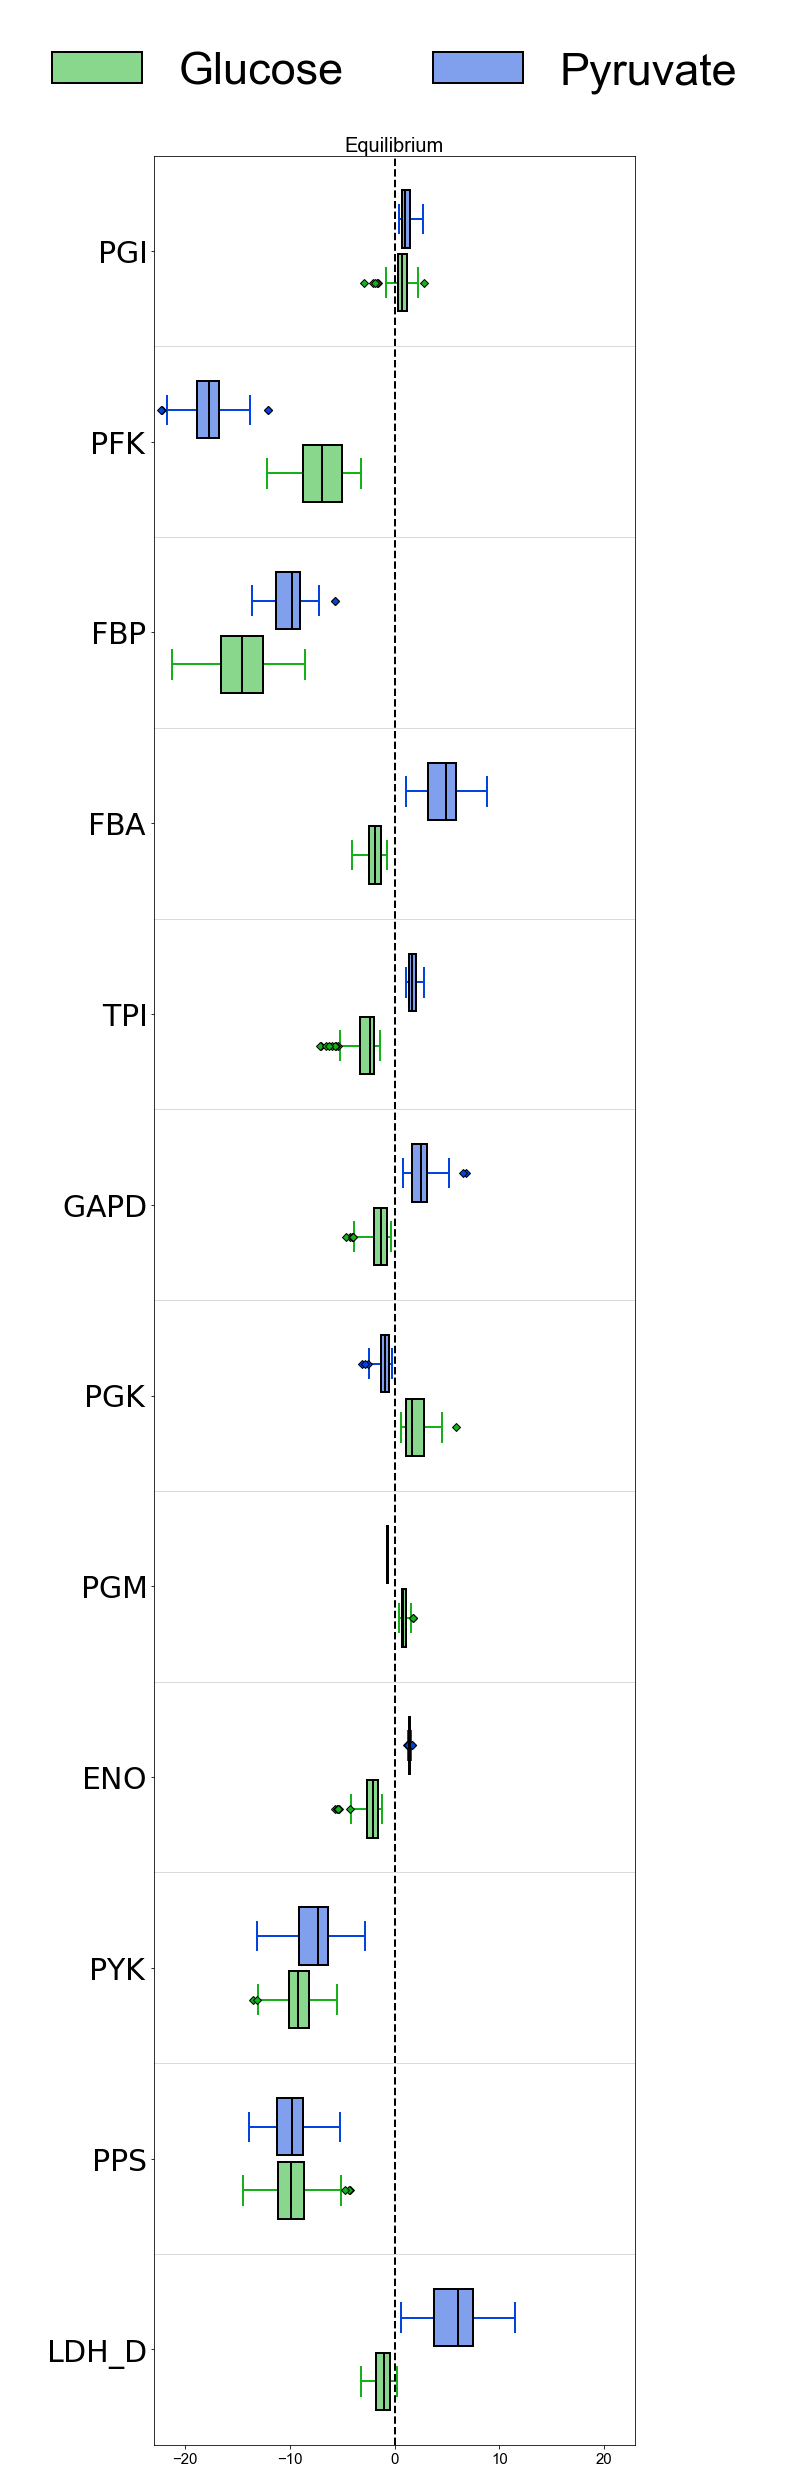

In [6]:
if not include_gibbs:
    fig_gibbs = create_all_enzyme_gibbs_energy_figure(
        all_enzymes=enzyme_ids,
        model_dicts=model_dicts,
        isozyme_split_percentages=split_percentages,
        Keq_df=Keq_df,
        differential=False,
        flux_sensitivity=False,
        colors=colors,
        excluded_isozymes=["PFK2", "FBP2", "FBA2", "PGMi", "PYK2"],
        temperature=310.15)
    if save_figures:
        save_figure("all_enzymes", "_".join(("Gibbs", *mediums)), fig_type, fig_gibbs,
                    svg=svg, pdf=pdf)

### Fractional abundance plots

Enzyme: PGI


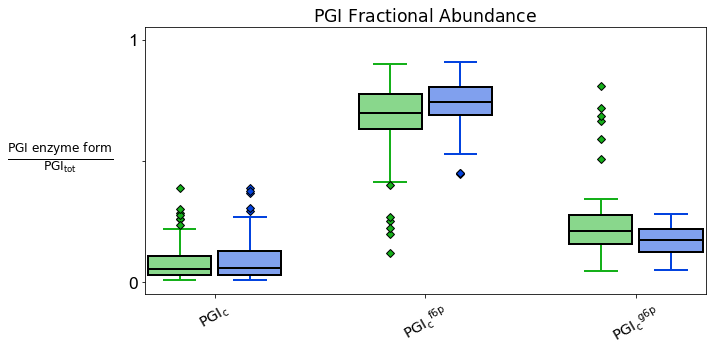

Enzyme: PFK1


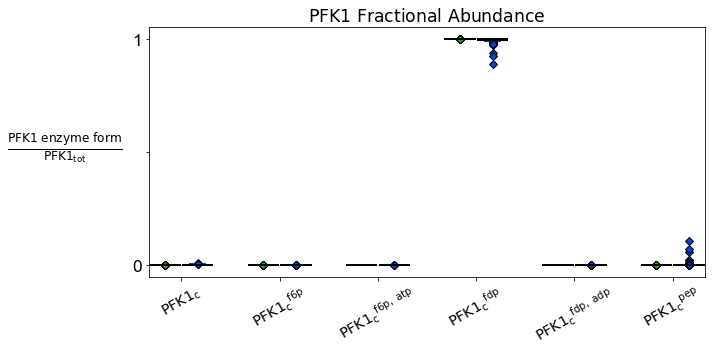

Enzyme: PFK2


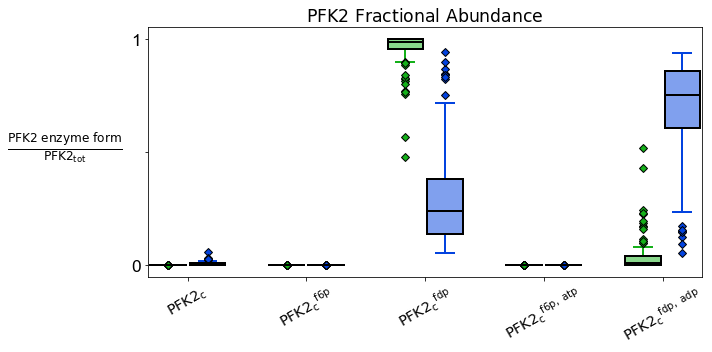

Enzyme: FBP1


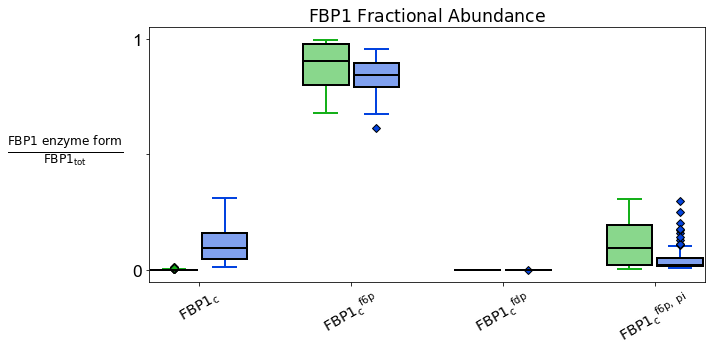

Enzyme: FBP2


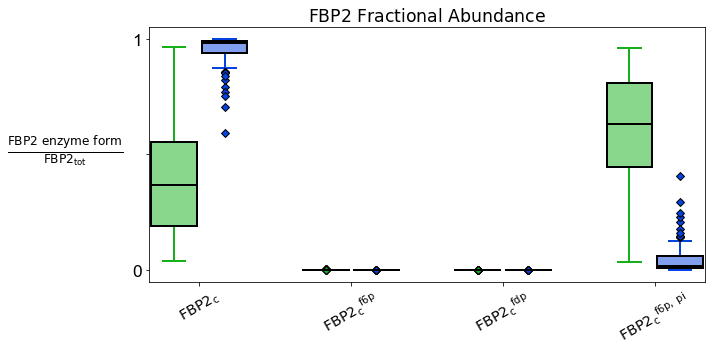

Enzyme: FBA1


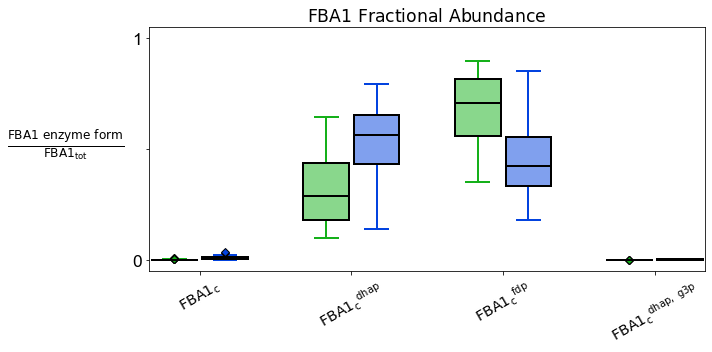

Enzyme: FBA2


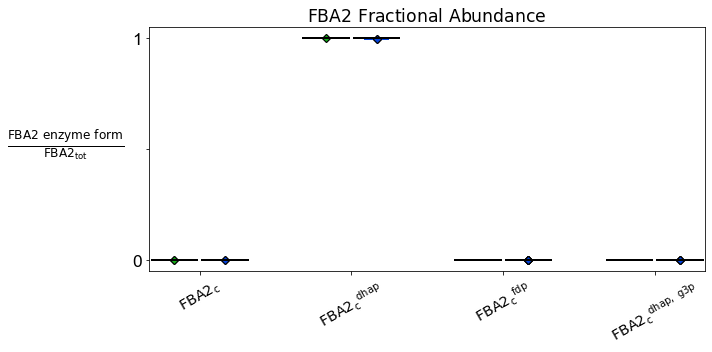

Enzyme: TPI


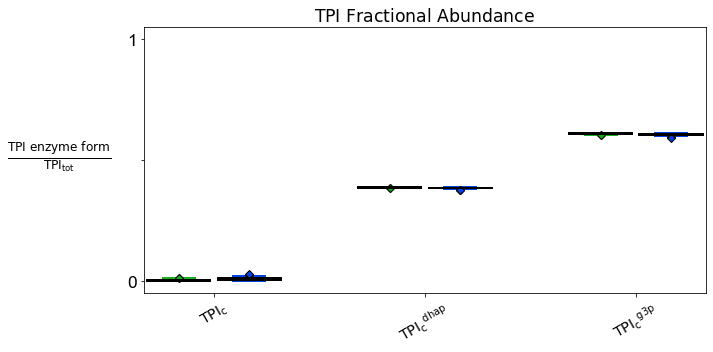

Enzyme: GAPD


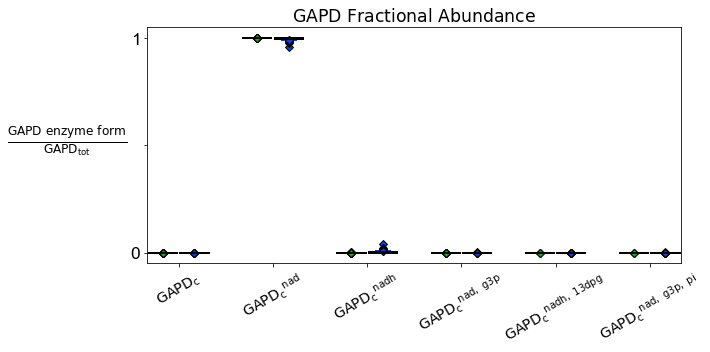

Enzyme: PGK


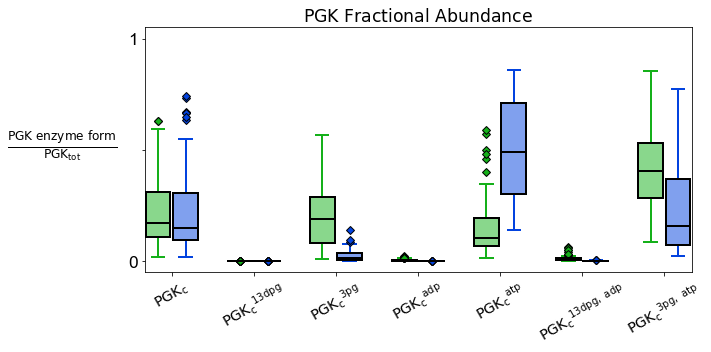

Enzyme: PGMd


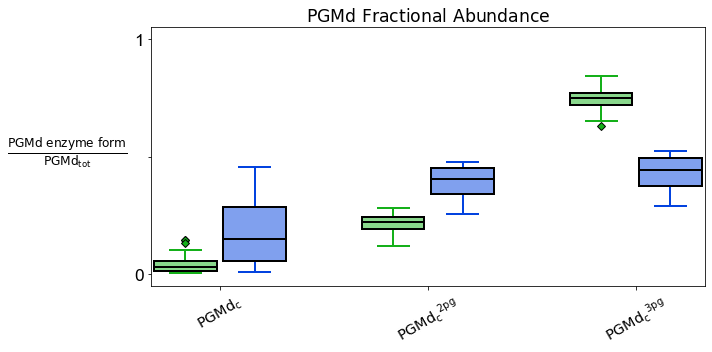

Enzyme: PGMi


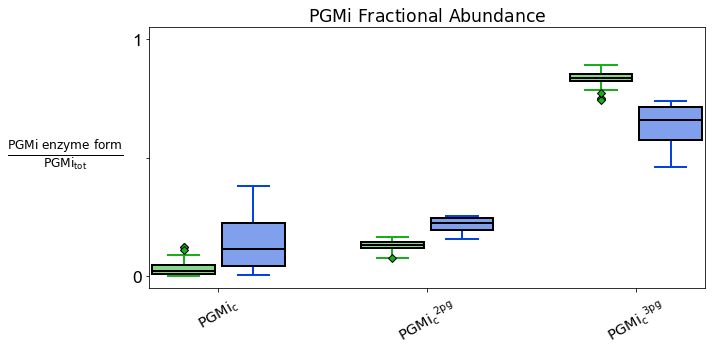

Enzyme: ENO


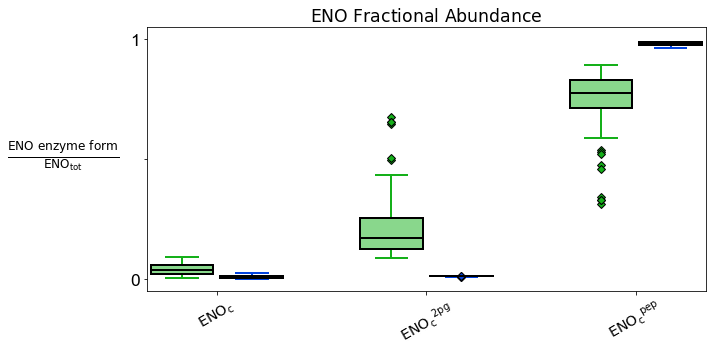

Enzyme: PYK1


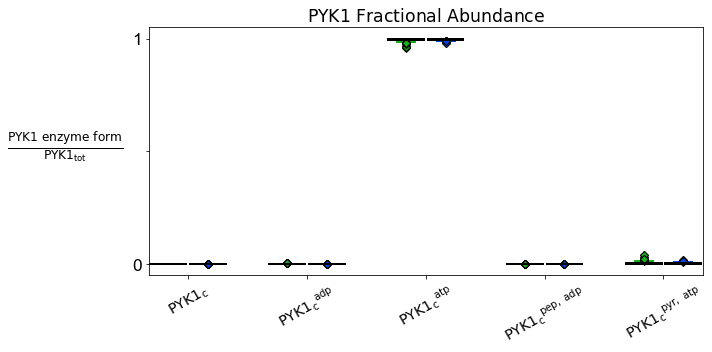

Enzyme: PYK2


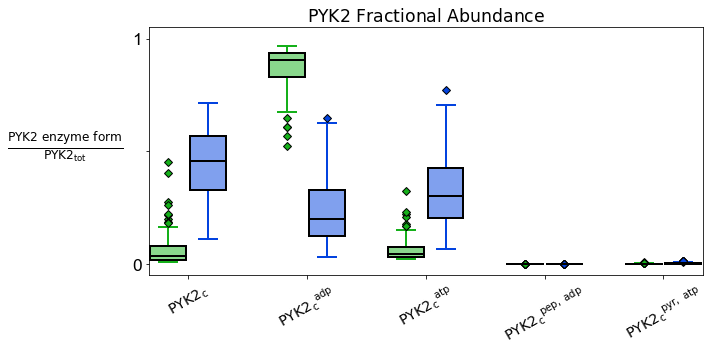

Enzyme: PPS


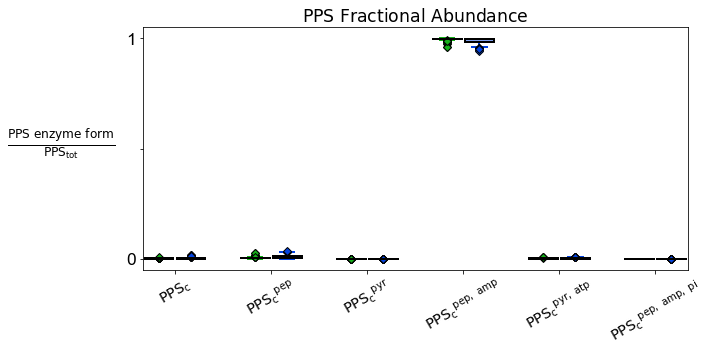

Enzyme: LDH_D


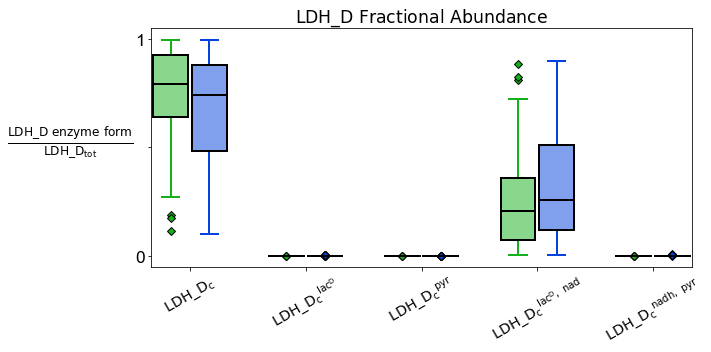

In [7]:
for enzyme_id in enzyme_ids:
    print("Enzyme: " + enzyme_id)
    if enzyme_id == "PFK1":
        groupings = group_PFK1(
            enzyme_module_dict=model_dicts.get(
                medium).get(
                    list(split_percentages)[0])[0].enzyme_modules.get_by_id(
                enzyme_id))
    else:
        groupings = None

    if individual:
        figs = create_figures_for_export(
            enzyme=enzyme_id, 
            model_dicts=model_dicts,
            isozyme_split_percentages=split_percentages,
            Keq_df=Keq_df,
            differential=False,
            include_gibbs_energy=False,
            flux_sensitivity=False,
            groupings=groupings,
            colors=colors)

        if save_figures:
            ax = figs[0].axes[0]
            ax.set_ylabel("")
            ax.set_title("")
            figs[0].tight_layout()
            save_figure(enzyme_id, "_".join(mediums), fig_type, figs[0], svg=svg, pdf=pdf)
                
    if differential and len(mediums) == 2:
        fig_diff = create_figures_for_export(
            enzyme=enzyme_id, 
            model_dicts=model_dicts,
            isozyme_split_percentages=split_percentages,
            Keq_df=Keq_df,
            differential=True,
            include_gibbs_energy=False,
            flux_sensitivity=False,
            groupings=groupings,
            colors="xkcd:red")[0]

        if save_figures:
            save_figure(enzyme_id, "_".join(("Diff", *mediums)), fig_type, fig_diff, svg=svg, pdf=pdf)
    plt.show()
    plt.close("all")